In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
data = pd.read_csv('TCS1.csv')

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0
...,...,...,...,...,...,...,...
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [5]:
data.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [6]:
data_new=data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4486 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4486 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 280.4+ KB


In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4486 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4486 non-null   datetime64[ns]
 1   Open       4486 non-null   float64       
 2   High       4486 non-null   float64       
 3   Low        4486 non-null   float64       
 4   Close      4486 non-null   float64       
 5   Adj Close  4486 non-null   float64       
 6   Volume     4486 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 280.4 KB


In [12]:
# Feature selection (You can choose Open, High, Low, Volume, or other features)
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

In [13]:
# Split the data into features (X) and target (y)
X = data[features]
y = data[target]

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # Assuming chronological order

In [15]:
# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 260.67556284485096


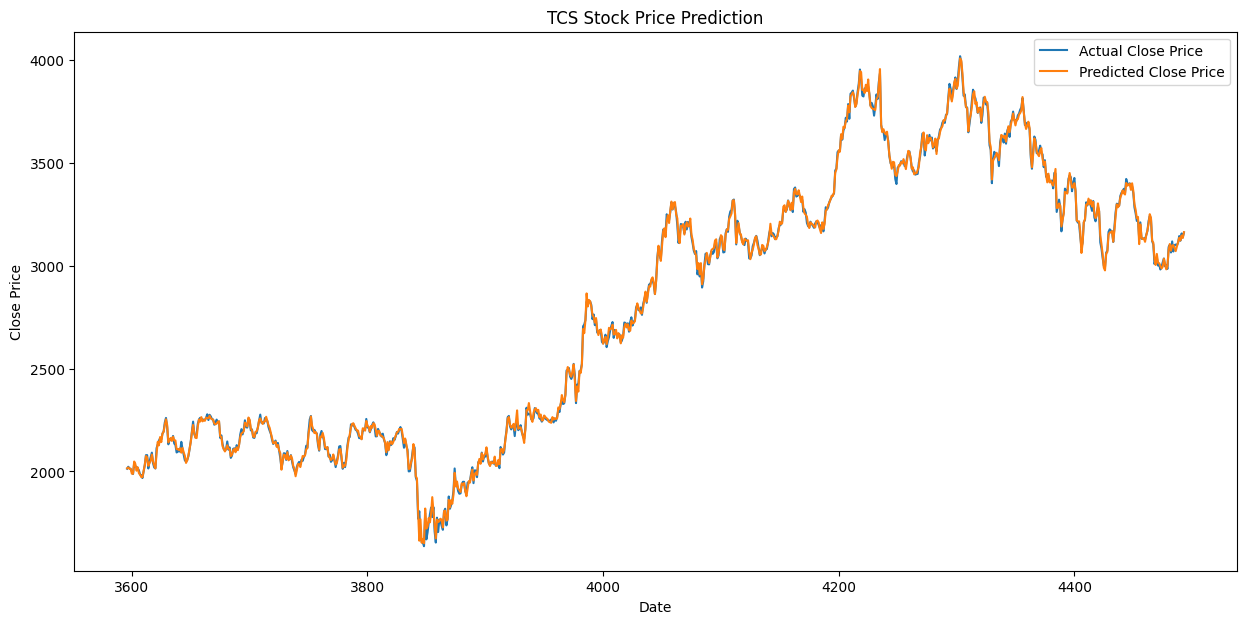

In [26]:
# Visualize the predictions
plt.figure(figsize=(15, 7))
plt.plot(data.index[-len(y_test):], y_test, label="Actual Close Price")
plt.plot(data.index[-len(y_test):], y_pred, label="Predicted Close Price")
plt.xlabel('Date')  
plt.ylabel('Close Price')
plt.title('TCS Stock Price Prediction')
plt.legend()
plt.show()


In [27]:
print(len(data['Date']))
print(len(y_test))

4486
898
